# Community Detection

In [1]:
import pickle

net = open("file_net", 'rb') 
net = pickle.load(net)
net

In [2]:
import cdlib

In [3]:
from cdlib import algorithms

net=net.to_undirected()

In [6]:
demon = algorithms.demon(net, min_com_size=3, epsilon=0.25)

In [10]:
demon.communities[0]

['1129641754486030338',
 '1131266046386683905',
 '1131546823536119808',
 '1131837271559364608',
 '1131868559259439104',
 '1132167302953222144',
 '1132183883561222145',
 '1132214005731418112',
 '1132214963542593536',
 '1132229488161492993',
 '1132276135528734720',
 '1132277557716508672',
 '1132277726734364673',
 '1132278729055641600',
 '1132282810562166786',
 '1132283656284921857',
 '1132285151071940610',
 '1132293259424927747',
 '1132298714368937984',
 '1132299085875224576',
 '1132301341752217605',
 '1132301432097521665',
 '1132301652856324097',
 '1132306935817150464',
 '@100glitterstars',
 '@1lacade1',
 '@4_stockport',
 '@_canan__',
 '@abbiebeebee',
 '@abcpoppins',
 '@acoustics_in_uk',
 '@adamboad',
 '@adorsetbumpkin',
 '@agendaforreform',
 '@ahdefoof',
 '@aikisz',
 '@aimeepaterson',
 '@aknitwit',
 '@aleks_lewicki',
 '@alexandrabulat',
 '@all_insane',
 '@andrea95115861',
 '@andrewesque',
 '@andrewkerr9000',
 '@andrewmcmullins',
 '@andrewwebb35',
 '@andycooke713',
 '@annabindi2',
 '@an

In [4]:
louvaincomm = algorithms.louvain(net)

In [5]:
len(louvaincomm.communities)

381

In [6]:
label= algorithms.label_propagation(net)

In [7]:
len(label.communities)

2361

In [4]:
demon = algorithms.demon(net, min_com_size=3, epsilon=0.25)

In [5]:
demon.communities

[['1131266046386683905',
  '1131546823536119808',
  '1131837271559364608',
  '1131868559259439104',
  '1132167302953222144',
  '1132183883561222145',
  '1132214005731418112',
  '1132214963542593536',
  '1132229488161492993',
  '1132276135528734720',
  '1132277557716508672',
  '1132277726734364673',
  '1132278729055641600',
  '1132283656284921857',
  '1132285151071940610',
  '1132291899094700033',
  '1132293259424927747',
  '1132298714368937984',
  '1132299085875224576',
  '1132301361406779394',
  '1132301432097521665',
  '1132301652856324097',
  '1132304422615306241',
  '1132305380527222784',
  '1132306935817150464',
  '@100glitterstars',
  '@1lacade1',
  '@4_stockport',
  '@_canan__',
  '@abbiebeebee',
  '@abcpoppins',
  '@acoustics_in_uk',
  '@adamboad',
  '@adorsetbumpkin',
  '@agendaforreform',
  '@ahdefoof',
  '@aikisz',
  '@aimeepaterson',
  '@aknitwit',
  '@aleks_lewicki',
  '@alexandrabulat',
  '@all_insane',
  '@andrea95115861',
  '@andrewesque',
  '@andrewkerr9000',
  '@andre

In [22]:
demon.modularity_density()

FitnessResult(min=None, max=None, score=42.38908757649528, std=None)

In [11]:
len(net.edges)

34656

In [10]:
eigenvector = algorithms.eigenvector(net)

In [11]:
len(eigenvector.communities)

314

In [27]:
print(len(demon.communities), " ", len(eigenvector.communities), " ", len(louvaincomm.communities))

492   314   381


In [13]:
print(len(demon.communities[0]), len(eigenvector.communities[0]), len(louvaincomm.communities[0])
)

460 15054 1350


In [16]:
import pandas as pd
nodes = pd.read_csv("data/ue_25m_1750_N.csv")
ncol = ['name', 'label', 'width', 'height','x', 'y', 'color', 'twitter_type','created_at', 'lang', 
        'friends_count', 'followers_count', 'emoji_html_decimal', 'emoji_utf8']
ndrop = ndrop = ['label', 'width', 'height','x', 'y','created_at', 'color', 'emoji_html_decimal', 'emoji_utf8', 'twitter_type',  'friends_count', 'followers_count']
nodes.columns=ncol
nodes= nodes.drop(ndrop,axis=1)
nodes.head()

,name,lang
0,1132269200846856192,it
1,@aleguerani,NaN
2,1132265630458105858,it
3,@_marcov_,NaN
4,#fuorisede,NaN


In [22]:
nodes.lang.value_counts().head(6)

en     3905
it     2429
und     319
fr      282
es      267
de      179
Name: lang, dtype: int64

In [25]:
2429/(3905+2429+319+282+267+179)

0.3290881994309714

In [120]:
for i in eigenvector.communities:
    if len(i)>100:
        eng=0
        it=0
        fr=0
        es=0
        de=0
        print(len(i))
        for k in i:
            if k[0]=="1":
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "en":
                    eng = eng+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "fr":
                    fr = fr+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "it":
                    it = it+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "es":
                    es = es+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "de":
                    de = de+1
        print(eng/(eng+fr+it+es+de), fr/(eng+fr+it+es+de), it/(eng+fr+it+es+de), es/(eng+fr+it+es+de), de/(eng+fr+it+es+de))

15054
0.4940225035161744 0.04342475386779184 0.39556962025316456 0.039029535864978905 0.027953586497890294
1590
0.9915662650602409 0.0 0.0 0.0 0.008433734939759036


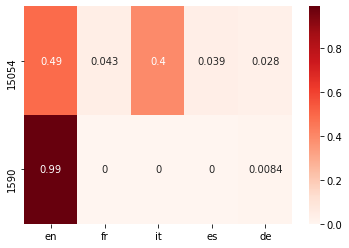

In [19]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= [15054, 1590]
Cols = ['en', 'fr', 'it', 'es','de']

tab= [[0.4940225035161744, 0.04342475386779184, 0.39556962025316456, 0.039029535864978905, 0.027953586497890294],
     [0.9915662650602409, 0.0, 0.0, 0.0, 0.008433734939759036]]

df = DataFrame(tab, index=Index, columns=Cols)

sns.heatmap(df, annot=True, cmap="Reds")

In [121]:
for i in demon.communities:
    if len(i)>100:
        eng=0
        it=0
        fr=0
        es=0
        de=0
        print(len(i))
        for k in i:
            if k[0]=="1":
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "en":
                    eng = eng+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "fr":
                    fr = fr+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "it":
                    it = it+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "es":
                    es = es+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "de":
                    de = de+1
        print(eng/(eng+fr+it+es+de), fr/(eng+fr+it+es+de), it/(eng+fr+it+es+de), es/(eng+fr+it+es+de), de/(eng+fr+it+es+de))

454
1.0 0.0 0.0 0.0 0.0
415
1.0 0.0 0.0 0.0 0.0
203
1.0 0.0 0.0 0.0 0.0
152
0.9333333333333333 0.06666666666666667 0.0 0.0 0.0
152
1.0 0.0 0.0 0.0 0.0
114
1.0 0.0 0.0 0.0 0.0
102
0.05555555555555555 0.0 0.9444444444444444 0.0 0.0


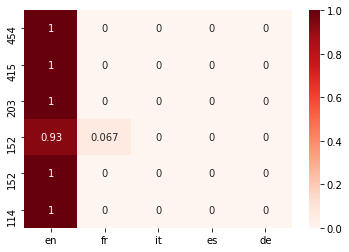

In [20]:

Index= [454, 415, 203, 152, 152, 114]
Cols = ['en', 'fr', 'it', 'es','de']

tab= [[1,0,0,0,0],
     [1,0,0,0,0],
     [1,0,0,0,0],
     [0.93, 0.06666,0,0,0],
     [1,0,0,0,0],
     [1,0,0,0,0]]

df = DataFrame(tab, index=Index, columns=Cols)

sns.heatmap(df, annot=True, cmap="Reds")

In [49]:

Cols = ['en', 'fr', 'it', 'es','de']

tab= []
Index=[]


for i in louvaincomm.communities:
    if len(i)>100:
        eng=0
        it=0
        fr=0
        es=0
        de=0
        print(len(i))
        Index.append(len(i))
        for k in i:
            if k[0]=="1":
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "en":
                    eng = eng+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "fr":
                    fr = fr+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "it":
                    it = it+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "es":
                    es = es+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "de":
                    de = de+1
        tab.append([eng/(eng+fr+it+es+de),fr/(eng+fr+it+es+de),it/(eng+fr+it+es+de),es/(eng+fr+it+es+de),de/(eng+fr+it+es+de)])
        print(eng/(eng+fr+it+es+de), fr/(eng+fr+it+es+de), it/(eng+fr+it+es+de), es/(eng+fr+it+es+de), de/(eng+fr+it+es+de))
        

        

1350
1.0 0.0 0.0 0.0 0.0
961
0.02577319587628866 0.0 0.9639175257731959 0.010309278350515464 0.0
716
0.8769716088328076 0.006309148264984227 0.056782334384858045 0.01892744479495268 0.04100946372239748
704
0.6179245283018868 0.03773584905660377 0.02830188679245283 0.009433962264150943 0.30660377358490565
703
0.015479876160990712 0.01238390092879257 0.9721362229102167 0.0 0.0
630
0.9120521172638436 0.07166123778501629 0.013029315960912053 0.003257328990228013 0.0
612
0.7772511848341233 0.07582938388625593 0.08056872037914692 0.009478672985781991 0.05687203791469194
592
0.7272727272727273 0.010101010101010102 0.15656565656565657 0.015151515151515152 0.09090909090909091
552
0.04739336492890995 0.0 0.933649289099526 0.018957345971563982 0.0
525
0.007547169811320755 0.0 0.9886792452830189 0.0037735849056603774 0.0
523
0.8918918918918919 0.08108108108108109 0.0 0.0 0.02702702702702703
512
0.07792207792207792 0.004329004329004329 0.9090909090909091 0.008658008658008658 0.0
464
0.9672897196261

In [51]:
print(len(Index), len(tab))

41 41


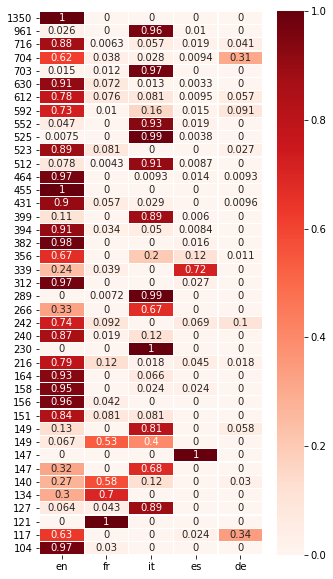

In [68]:
import matplotlib.pyplot as plt

df = DataFrame(tab, index=Index, columns=Cols)
plt.figure(figsize = (5,10))
sns.heatmap(df, annot=True, cmap="Reds", linewidths=.1 )

In [70]:



for i in louvaincomm.communities:
    if len(i)>100:
        eng=0
        it=0
        fr=0
        es=0
        de=0
        print(len(i))
        for k in i:
            if k[0]=="1":
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "en":
                    eng = eng+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "fr":
                    fr = fr+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "it":
                    it = it+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "es":
                    es = es+1
                if nodes[nodes["name"]==k][["lang"]].iloc[0,0] == "de":
                    de = de+1
        print((eng+fr+it+es+de), " ", (eng+fr+it+es+de)/len(i))
        print(eng/(eng+fr+it+es+de), fr/(eng+fr+it+es+de), it/(eng+fr+it+es+de), es/(eng+fr+it+es+de), de/(eng+fr+it+es+de))
        

        

1350
694   0.5140740740740741
1.0 0.0 0.0 0.0 0.0
961
388   0.4037460978147763
0.02577319587628866 0.0 0.9639175257731959 0.010309278350515464 0.0
716
317   0.44273743016759776
0.8769716088328076 0.006309148264984227 0.056782334384858045 0.01892744479495268 0.04100946372239748
704
212   0.30113636363636365
0.6179245283018868 0.03773584905660377 0.02830188679245283 0.009433962264150943 0.30660377358490565
703
323   0.4594594594594595
0.015479876160990712 0.01238390092879257 0.9721362229102167 0.0 0.0
630
307   0.4873015873015873
0.9120521172638436 0.07166123778501629 0.013029315960912053 0.003257328990228013 0.0
612
211   0.34477124183006536
0.7772511848341233 0.07582938388625593 0.08056872037914692 0.009478672985781991 0.05687203791469194
592
198   0.3344594594594595
0.7272727272727273 0.010101010101010102 0.15656565656565657 0.015151515151515152 0.09090909090909091
552
211   0.3822463768115942
0.04739336492890995 0.0 0.933649289099526 0.018957345971563982 0.0
525
265   0.5047619047619